In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D,AveragePooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd

In [2]:
d=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\code_new\five.csv")
#1 zcr
#2 to 11 chroma stft
# 12 to 32 mfcc
#33 rms
# rest mel

X = d.iloc[: ,:-1].values
Y = d['label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [3]:
x_train_zcr,x_train_chroma_stft,x_train_mfcc,x_train_rms,x_train_mel=[],[],[],[],[]
x_test_zcr,x_test_chroma_stft,x_test_mfcc,x_test_rms,x_test_mel=[],[],[],[],[]

for i in range(len(x_train)):
    x_train_zcr.append([x_train[i][0]])
    x_train_chroma_stft.append(x_train[i][1:12])
    x_train_mfcc.append(x_train[i][12:33])
    x_train_rms.append([x_train[i][33]])
    x_train_mel.append(x_train[i][34:])
for i in range(len(x_test)):  
    x_test_zcr.append([x_test[i][0]])
    x_test_chroma_stft.append(x_test[i][1:12])
    x_test_mfcc.append(x_test[i][12:33])
    x_test_rms.append([x_test[i][33]])
    x_test_mel.append(x_test[i][34:])
x_train_zcr,x_train_chroma_stft,x_train_mfcc,x_train_rms,x_train_mel=np.array(x_train_zcr),np.array(x_train_chroma_stft),np.array(x_train_mfcc),np.array(x_train_rms),np.array(x_train_mel)
x_test_zcr,x_test_chroma_stft,x_test_mfcc,x_test_rms,x_test_mel=np.array(x_test_zcr),np.array(x_test_chroma_stft),np.array(x_test_mfcc),np.array(x_test_rms),np.array(x_test_mel)


In [4]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.1)
history_1=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])
model.save("cnn_all.h4")
pred_test_1 = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test_1)
y_test_1 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_1.flatten()
df.head()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

226/226 [==============================] - 10s 46ms/step - loss: 0.2082 - accuracy: 0.9275 - val_loss: 2.2625 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 89/100
226/226 [==============================] - 11s 47ms/step - loss: 0.3052 - accuracy: 0.8934 - val_loss: 2.3802 - val_accuracy: 0.5711 - lr: 0.0010
Epoch 90/100
226/226 [==============================] - 10s 46ms/step - loss: 0.2476 - accuracy: 0.9065 - val_loss: 2.3369 - val_accuracy: 0.5799 - lr: 0.0010
Epoch 91/100
226/226 [==============================] - 10s 44ms/step - loss: 0.2174 - accuracy: 0.9216 - val_loss: 2.3427 - val_accuracy: 0.5786 - lr: 0.0010
Epoch 92/100
226/226 [==============================] - 10s 44ms/step - loss: 0.2133 - accuracy: 0.9203 - val_loss: 2.4125 - val_accuracy: 0.5761 - lr: 0.0010
Epoch 93/100
226/226 [==============================] - 11s 48ms/step - loss: 0.2132 - accuracy: 0.9203 - val_loss: 2.2657 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 94/100
226/226 [==============================] - 10s

INFO:tensorflow:Assets written to: cnn_all.h4\assets


INFO:tensorflow:Assets written to: cnn_all.h4\assets


76/76 [==============================] - 1s 13ms/step


,Predicted Labels,Actual Labels
0,angry,fear
1,sad,fear
2,happy,happy
3,sad,sad
4,fear,sad


[5.7577074e-07 2.3603586e-11 4.4294915e-01 5.5571675e-01 1.3335287e-03]


In [5]:
df.head(10)

,Predicted Labels,Actual Labels
0,angry,fear
1,sad,fear
2,happy,happy
3,sad,sad
4,fear,sad
5,happy,happy
6,angry,angry
7,fear,happy
8,fear,sad
9,angry,angry


In [6]:
r"""d=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\code_new\mel.csv")

X = d.iloc[: ,:-1].values
Y = d['label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)"""
print(x_train_mel.shape, y_train.shape, x_test_mel.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_mel)
x_test = scaler.transform(x_test_mel)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.1)
history_2=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])
model.save("cnn_mel.h4")
pred_test_2 = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test_2)
y_test_2 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_2.flatten()
df.head(10)

(7211, 128) (7211, 5) (2404, 128) (2404, 5)
(7211, 128) (7211, 5) (2404, 128) (2404, 5)
(7211, 128, 1) (7211, 5) (2404, 128, 1) (2404, 5)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 128, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 64, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 64, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 32, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 32, 128)    

Epoch 37/100
113/113 [==============================] - 7s 62ms/step - loss: 0.9349 - accuracy: 0.6181 - val_loss: 1.1199 - val_accuracy: 0.5786 - lr: 0.0010
Epoch 38/100
113/113 [==============================] - 7s 62ms/step - loss: 0.9337 - accuracy: 0.6232 - val_loss: 1.1168 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 39/100
113/113 [==============================] - 7s 62ms/step - loss: 0.9083 - accuracy: 0.6236 - val_loss: 1.1590 - val_accuracy: 0.5707 - lr: 0.0010
Epoch 40/100
113/113 [==============================] - 7s 62ms/step - loss: 0.9014 - accuracy: 0.6353 - val_loss: 1.1342 - val_accuracy: 0.5770 - lr: 0.0010
Epoch 41/100
113/113 [==============================] - 7s 62ms/step - loss: 0.9181 - accuracy: 0.6271 - val_loss: 1.1508 - val_accuracy: 0.5553 - lr: 0.0010
Epoch 42/100
113/113 [==============================] - 7s 62ms/step - loss: 0.9186 - accuracy: 0.6231 - val_loss: 1.1706 - val_accuracy: 0.5724 - lr: 0.0010
Epoch 43/100
113/113 [==============================

Epoch 89/100
113/113 [==============================] - 7s 62ms/step - loss: 0.6627 - accuracy: 0.7197 - val_loss: 1.6491 - val_accuracy: 0.5695 - lr: 0.0010
Epoch 90/100
113/113 [==============================] - 7s 62ms/step - loss: 0.6789 - accuracy: 0.7256 - val_loss: 1.5642 - val_accuracy: 0.5620 - lr: 0.0010
Epoch 91/100
113/113 [==============================] - 7s 62ms/step - loss: 0.6539 - accuracy: 0.7297 - val_loss: 1.6650 - val_accuracy: 0.5745 - lr: 0.0010
Epoch 92/100
113/113 [==============================] - 7s 62ms/step - loss: 0.6573 - accuracy: 0.7275 - val_loss: 1.6391 - val_accuracy: 0.5765 - lr: 0.0010
Epoch 93/100
113/113 [==============================] - 7s 62ms/step - loss: 0.6521 - accuracy: 0.7383 - val_loss: 1.6165 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 94/100
113/113 [==============================] - 7s 62ms/step - loss: 0.6373 - accuracy: 0.7373 - val_loss: 1.6337 - val_accuracy: 0.5682 - lr: 0.0010
Epoch 95/100
113/113 [==============================

INFO:tensorflow:Assets written to: cnn_mel.h4\assets


INFO:tensorflow:Assets written to: cnn_mel.h4\assets


76/76 [==============================] - 1s 12ms/step


,Predicted Labels,Actual Labels
0,sad,fear
1,sad,fear
2,angry,happy
3,sad,sad
4,sad,sad
5,happy,happy
6,angry,angry
7,happy,happy
8,sad,sad
9,angry,angry


In [7]:
r"""d=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\code_new\mfcc.csv")

X = d.iloc[: ,:-1].values
Y = d['label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)"""
x_train_mfcc.shape, y_train.shape, x_test_mfcc.shape, y_test.shape

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_mfcc)
x_test = scaler.transform(x_test_mfcc)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.1)
history_3=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])
model.save("cnn_mfcc.h4")
pred_test_3 = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test_3)
y_test_3 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_3.flatten()
df.head(10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 21, 256)           1536      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 11, 256)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 11, 256)           327936    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 6, 256)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 6, 128)            163968    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 3, 128)          

Epoch 38/100
113/113 [==============================] - 2s 19ms/step - loss: 0.4201 - accuracy: 0.8480 - val_loss: 1.5569 - val_accuracy: 0.5674 - lr: 0.0010
Epoch 39/100
113/113 [==============================] - 2s 19ms/step - loss: 0.3843 - accuracy: 0.8574 - val_loss: 1.6490 - val_accuracy: 0.5778 - lr: 0.0010
Epoch 40/100
113/113 [==============================] - 2s 18ms/step - loss: 0.3677 - accuracy: 0.8631 - val_loss: 1.7291 - val_accuracy: 0.5828 - lr: 0.0010
Epoch 41/100
113/113 [==============================] - 2s 19ms/step - loss: 0.3462 - accuracy: 0.8771 - val_loss: 1.6384 - val_accuracy: 0.5749 - lr: 0.0010
Epoch 42/100
113/113 [==============================] - 2s 18ms/step - loss: 0.3375 - accuracy: 0.8792 - val_loss: 1.7328 - val_accuracy: 0.5641 - lr: 0.0010
Epoch 43/100
113/113 [==============================] - 2s 19ms/step - loss: 0.3292 - accuracy: 0.8816 - val_loss: 1.8291 - val_accuracy: 0.5649 - lr: 0.0010
Epoch 44/100
113/113 [==============================

Epoch 90/100
113/113 [==============================] - 2s 20ms/step - loss: 0.0884 - accuracy: 0.9705 - val_loss: 3.2208 - val_accuracy: 0.5645 - lr: 0.0010
Epoch 91/100
113/113 [==============================] - 2s 21ms/step - loss: 0.1087 - accuracy: 0.9674 - val_loss: 2.9838 - val_accuracy: 0.5566 - lr: 0.0010
Epoch 92/100
113/113 [==============================] - 2s 22ms/step - loss: 0.0914 - accuracy: 0.9716 - val_loss: 3.3802 - val_accuracy: 0.5641 - lr: 0.0010
Epoch 93/100
113/113 [==============================] - 2s 20ms/step - loss: 0.1108 - accuracy: 0.9649 - val_loss: 2.9520 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 94/100
113/113 [==============================] - 2s 20ms/step - loss: 0.0787 - accuracy: 0.9761 - val_loss: 3.2992 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 95/100
113/113 [==============================] - 2s 20ms/step - loss: 0.1137 - accuracy: 0.9648 - val_loss: 3.1215 - val_accuracy: 0.5549 - lr: 0.0010
Epoch 96/100
113/113 [==============================

INFO:tensorflow:Assets written to: cnn_mfcc.h4\assets


INFO:tensorflow:Assets written to: cnn_mfcc.h4\assets


76/76 [==============================] - 0s 4ms/step


,Predicted Labels,Actual Labels
0,angry,fear
1,sad,fear
2,happy,happy
3,sad,sad
4,sad,sad
5,disgust,happy
6,angry,angry
7,disgust,happy
8,sad,sad
9,angry,angry


In [8]:
r"""d=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\code_new\rms.csv")

X = d.iloc[: ,:-1].values
Y = d['label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)"""
x_train_rms.shape, y_train.shape, x_test_rms.shape, y_test.shape

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_rms)
x_test = scaler.transform(x_test_rms)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.1)
history_4=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])
model.save("cnn_rms.h4")
pred_test_4 = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test_4)
y_test_4 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_4.flatten()
df.head(10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 1, 256)            1536      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 1, 256)            327936    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 128)            163968    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 1, 128)          

Epoch 38/100
113/113 [==============================] - 1s 9ms/step - loss: 1.4329 - accuracy: 0.3836 - val_loss: 1.4052 - val_accuracy: 0.3894 - lr: 0.0010
Epoch 39/100
113/113 [==============================] - 1s 9ms/step - loss: 1.4307 - accuracy: 0.3823 - val_loss: 1.4073 - val_accuracy: 0.3894 - lr: 0.0010
Epoch 40/100
113/113 [==============================] - 1s 9ms/step - loss: 1.4262 - accuracy: 0.3840 - val_loss: 1.4063 - val_accuracy: 0.3931 - lr: 0.0010
Epoch 41/100
113/113 [==============================] - 1s 9ms/step - loss: 1.4315 - accuracy: 0.3823 - val_loss: 1.4106 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 42/100
113/113 [==============================] - 1s 10ms/step - loss: 1.4272 - accuracy: 0.3862 - val_loss: 1.4092 - val_accuracy: 0.3902 - lr: 0.0010
Epoch 43/100
113/113 [==============================] - 1s 9ms/step - loss: 1.4279 - accuracy: 0.3823 - val_loss: 1.4078 - val_accuracy: 0.3939 - lr: 0.0010
Epoch 44/100
113/113 [==============================] - 1

INFO:tensorflow:Assets written to: cnn_rms.h4\assets


INFO:tensorflow:Assets written to: cnn_rms.h4\assets


76/76 [==============================] - 0s 2ms/step


,Predicted Labels,Actual Labels
0,angry,fear
1,sad,fear
2,angry,happy
3,sad,sad
4,sad,sad
5,angry,happy
6,angry,angry
7,disgust,happy
8,sad,sad
9,angry,angry


In [9]:
r"""d=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\code_new\chroma_stft.csv")
X = d.iloc[: ,:-1].values
Y = d['label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)"""
print(x_train_chroma_stft.shape, y_train.shape, x_test_chroma_stft.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_chroma_stft)
x_test = scaler.transform(x_test_chroma_stft)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.1)
history_5=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])
model.save("cnn_chroma.h4")
pred_test_5 = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test_5)
y_test_5 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_5.flatten()
df.head(10)

(7211, 11) (7211, 5) (2404, 11) (2404, 5)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 11, 256)           1536      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 6, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 6, 256)            327936    
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 3, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 3, 128)            163968    
                                                                 
 max_pooling

Epoch 89/100
113/113 [==============================] - 1s 12ms/step - loss: 0.2567 - accuracy: 0.9071 - val_loss: 4.3280 - val_accuracy: 0.3440 - lr: 0.0010
Epoch 90/100
113/113 [==============================] - 1s 12ms/step - loss: 0.2763 - accuracy: 0.8978 - val_loss: 4.3612 - val_accuracy: 0.3457 - lr: 0.0010
Epoch 91/100
113/113 [==============================] - 1s 12ms/step - loss: 0.2443 - accuracy: 0.9119 - val_loss: 4.3542 - val_accuracy: 0.3423 - lr: 0.0010
Epoch 92/100
113/113 [==============================] - 1s 12ms/step - loss: 0.2427 - accuracy: 0.9135 - val_loss: 4.5649 - val_accuracy: 0.3386 - lr: 0.0010
Epoch 93/100
113/113 [==============================] - 1s 12ms/step - loss: 0.2553 - accuracy: 0.9045 - val_loss: 4.5487 - val_accuracy: 0.3319 - lr: 0.0010
Epoch 94/100
113/113 [==============================] - 1s 12ms/step - loss: 0.2409 - accuracy: 0.9140 - val_loss: 4.6057 - val_accuracy: 0.3261 - lr: 0.0010
Epoch 95/100
113/113 [==============================

INFO:tensorflow:Assets written to: cnn_chroma.h4\assets


INFO:tensorflow:Assets written to: cnn_chroma.h4\assets


76/76 [==============================] - 0s 3ms/step


,Predicted Labels,Actual Labels
0,angry,fear
1,fear,fear
2,sad,happy
3,angry,sad
4,angry,sad
5,disgust,happy
6,sad,angry
7,disgust,happy
8,disgust,sad
9,fear,angry


In [10]:
r"""d=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\code_new\chroma_stft.csv")
X = d.iloc[: ,:-1].values
Y = d['label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)"""
print(x_train_zcr.shape, y_train.shape, x_test_zcr.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_zcr)
x_test = scaler.transform(x_test_zcr)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.1)
history_6=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])
model.save("cnn_zcr.h4")
pred_test_6 = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test_6)
y_test_6 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_6.flatten()
df.head(10)

(7211, 1) (7211, 5) (2404, 1) (2404, 5)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 1, 256)            1536      
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 1, 256)            327936    
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 1, 128)            163968    
                                                                 
 max_pooling1d

Epoch 89/100
113/113 [==============================] - 1s 10ms/step - loss: 1.5446 - accuracy: 0.3051 - val_loss: 1.5364 - val_accuracy: 0.3082 - lr: 0.0010
Epoch 90/100
113/113 [==============================] - 1s 10ms/step - loss: 1.5462 - accuracy: 0.3009 - val_loss: 1.5364 - val_accuracy: 0.3082 - lr: 0.0010
Epoch 91/100
113/113 [==============================] - 1s 10ms/step - loss: 1.5469 - accuracy: 0.3015 - val_loss: 1.5370 - val_accuracy: 0.3066 - lr: 0.0010
Epoch 92/100
113/113 [==============================] - 1s 10ms/step - loss: 1.5438 - accuracy: 0.3023 - val_loss: 1.5383 - val_accuracy: 0.3070 - lr: 0.0010
Epoch 93/100
113/113 [==============================] - 1s 10ms/step - loss: 1.5433 - accuracy: 0.3011 - val_loss: 1.5364 - val_accuracy: 0.3095 - lr: 0.0010
Epoch 94/100
113/113 [==============================] - 1s 10ms/step - loss: 1.5447 - accuracy: 0.3000 - val_loss: 1.5366 - val_accuracy: 0.3095 - lr: 0.0010
Epoch 95/100
113/113 [==============================

INFO:tensorflow:Assets written to: cnn_zcr.h4\assets


INFO:tensorflow:Assets written to: cnn_zcr.h4\assets


76/76 [==============================] - 0s 2ms/step


,Predicted Labels,Actual Labels
0,sad,fear
1,sad,fear
2,angry,happy
3,sad,sad
4,sad,sad
5,sad,happy
6,angry,angry
7,angry,happy
8,angry,sad
9,fear,angry


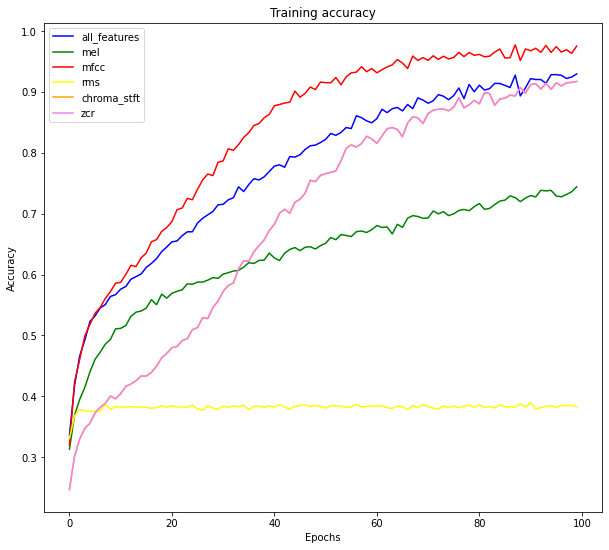

In [12]:
import matplotlib.pyplot as plt
l_1 = history_1.history['accuracy']
l_2 = history_2.history['accuracy']
l_3 = history_3.history['accuracy']
l_4 = history_4.history['accuracy']
l_5 = history_5.history['accuracy']
l_6 = history_5.history['accuracy']
plt.rcParams['figure.figsize'] = [10, 9]
epochs = range(0,100)
plt.plot(epochs, l_1, 'b', label='all_features')
plt.plot(epochs, l_2, 'g', label='mel')
plt.plot(epochs, l_3, 'red', label='mfcc')
plt.plot(epochs, l_4, 'yellow', label='rms')
plt.plot(epochs, l_5, 'orange', label='chroma_stft')
plt.plot(epochs, l_6, 'violet', label='zcr')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test_5))

In [31]:
print(classification_report(y_pred,y_test_5))

              precision    recall  f1-score   support

       angry       0.76      0.30      0.43      1224
     disgust       0.13      0.20      0.16       285
        fear       0.03      0.26      0.06        61
       happy       0.04      0.22      0.07        83
         sad       0.56      0.36      0.44       751

    accuracy                           0.30      2404
   macro avg       0.30      0.27      0.23      2404
weighted avg       0.58      0.30      0.38      2404



In [1]:
import pandas as pd

In [20]:
df=pd.DataFrame({"Predicted labels":["sad","disgust","happy","fear","fear"],"Actual labels":["sad","fear","happy","fear","sad"]})

In [21]:
df

,Predicted labels,Actual labels
0,sad,sad
1,disgust,fear
2,happy,happy
3,fear,fear
4,fear,sad


In [42]:

values=[["MFCC",0.7921,0.9752],["Mel",0.4941,0.7440],["Chroma",0.3818,.9171],["ZCR",0.2721,0.3015],["RMS",0.3463,0.3827],["Combining all features",0.5707,0.9294]]
columns=["Features","LSTM","CNN"]

In [43]:
d=pd.DataFrame(values,columns=columns)

In [44]:
d

,Features,LSTM,CNN
0,MFCC,0.7921,0.9752
1,Mel,0.4941,0.7440
2,Chroma,0.3818,0.9171
3,ZCR,0.2721,0.3015
4,RMS,0.3463,0.3827
5,Combining all features,0.5707,0.9294


In [45]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

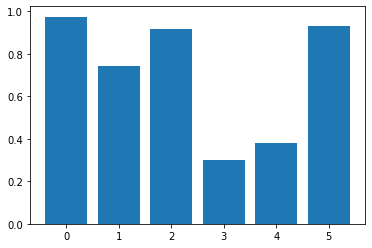

In [49]:
plt.bar(d.index,d["LSTM"],color="purple")
plt.bar(d.index,d["CNN"])

<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='Features'>

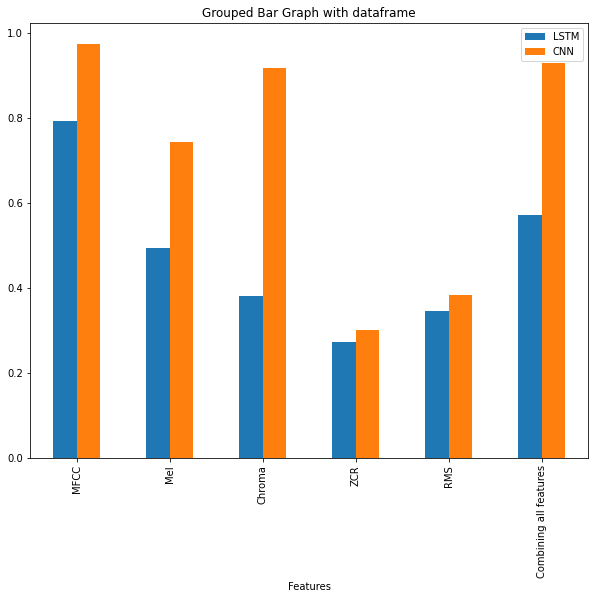

In [63]:
plt.rcParams['figure.figsize'] = [10, 8]
d.plot(x="Features",
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       30
1    B       20       25       15       25
2    C       12       15       19        6
3    D       10       29       13       19


<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='Team'>

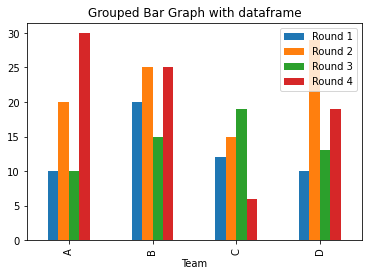

In [41]:

# importing package
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')